In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as wg
from IPython.display import display
import csv

In [28]:
dataFrame = pd.read_csv("mymoviedb.csv",lineterminator='\n')

In [132]:
dataFrame.head(10)
#dataFrame.shape
#dataFrame.info()
#dataFrame.isnull().sum()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


In [31]:
dataFrame['Vote_Average'].mean()

6.439533937112049

In [97]:
vectorizer = TfidfVectorizer(ngram_range=(1,2)) #looking at a set of 2 words together
tfidf = vectorizer.fit_transform(dataFrame["Overview"]) #convert "Overview" to a set of numbers (matrix)

#similarity = linear_kernel(tfidf, tfidf)
similarity = cosine_similarity(tfidf, tfidf)

indices = pd.Series(dataFrame.index, index=dataFrame['Title'])

In [158]:
def recommendations(title,similarity=similarity):
    
    title = title.upper()
    dataFrame['Title'] = dataFrame['Title'].apply(lambda x: x.upper())
    try:
        index = dataFrame[dataFrame['Title'] == title].index[0]
    except IndexError:
        return "NO RECOMMENDATIONS FOUND!"
    
    #index = indices[title]
    
    similarityScores = list(enumerate(similarity[index]))
    similarityScores = sorted(similarityScores, key=lambda x: x[1], reverse = True)
    
    similarityScores = similarityScores[1:11]
    m_indices = [i[0] for i in similarityScores]
    results = dataFrame["Title"].iloc[m_indices]
    #results = dataFrame.iloc[m_indices]
    
    return results

In [128]:
#recommendations('The Matrix')

In [159]:
input_title = wg.Text(
    placeholder='Enter a movie title',
    description='Movie Title:',
    layout=widgets.Layout(width='50%')
)
input_title

recommended_lists = wg.Output()


def on_type(data):
    with recommended_lists:
        recommended_lists.clear_output()
        title = data["new"]
        if len(title) != 0:
            display(recommendations(title))
            

input_title.observe(on_type, names='value')

display(input_title, recommended_lists)

Text(value='', description='Movie Title:', layout=Layout(width='50%'), placeholder='Enter a movie title')

Output()

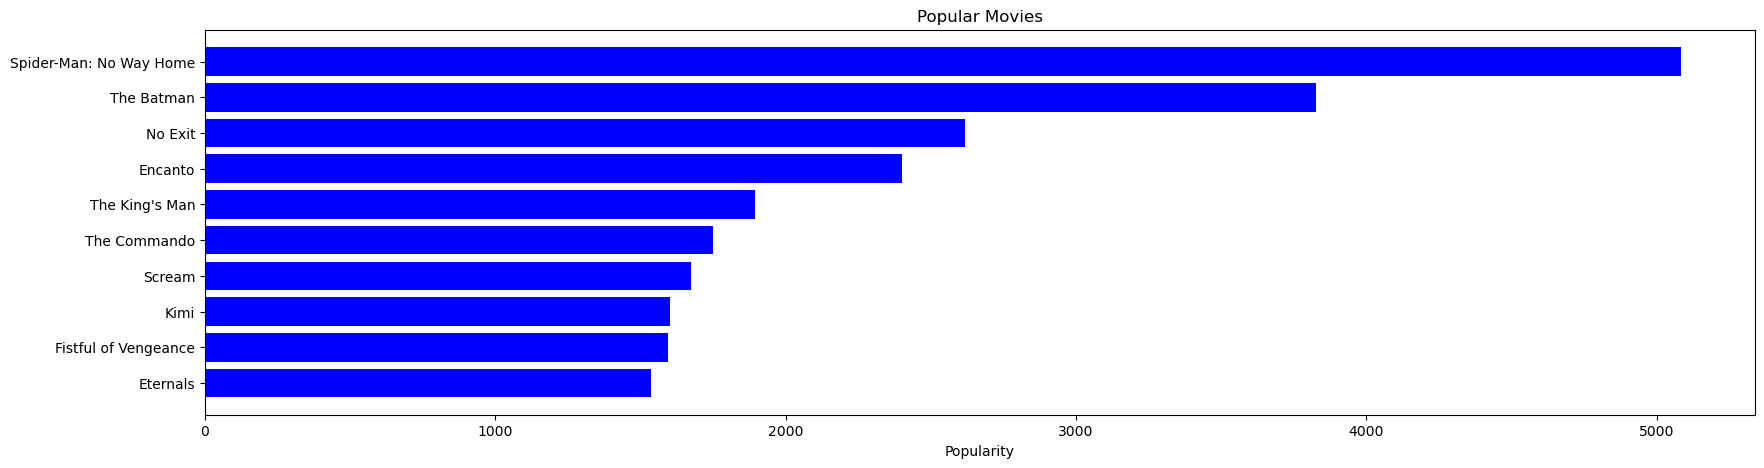

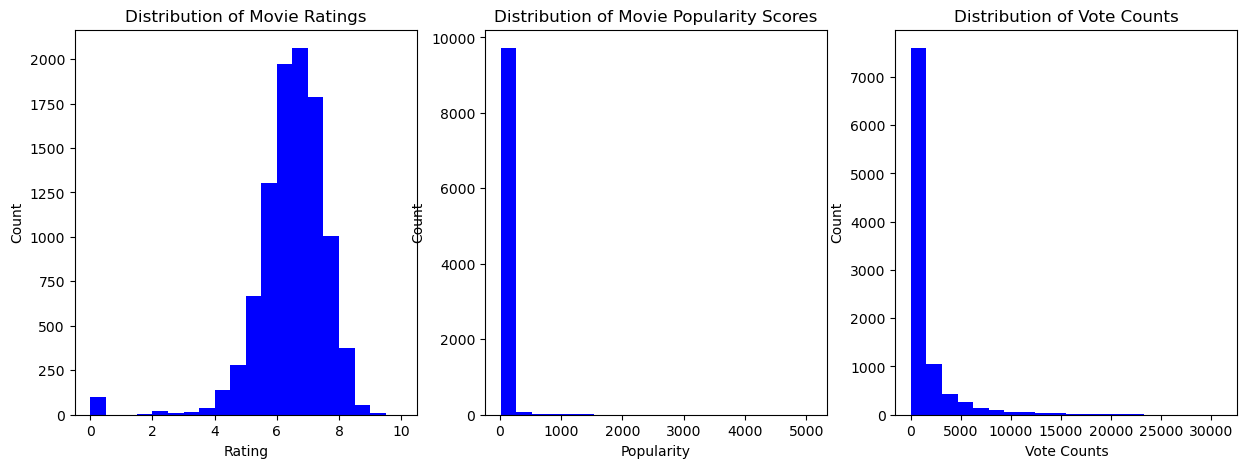

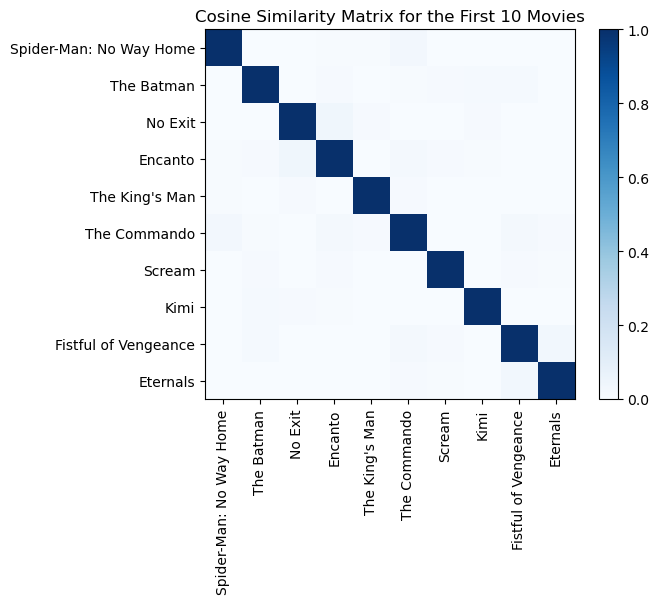

Text(value='', description='Movie Title:', layout=Layout(width='75%'), placeholder='Enter a movie title')

Output()

In [184]:
#Libaries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as wg
from IPython.display import display

#Read CSV file
dataFrame = pd.read_csv("mymoviedb.csv",lineterminator='\n')

#dataFrame.head(10)
#dataFrame.shape
#dataFrame.info()
#dataFrame.isnull().sum()

#Top 10 Popular Movies
popular = dataFrame.sort_values('Popularity', ascending = False)
plt.figure(figsize=(20,5))

plt.barh(popular['Title'].head(10),popular['Popularity'].head(10),align='center',color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.title('Popular Movies')

# plot histograms of the movie ratings, popularity scores, and vote counts
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(metadata['Vote_Average'], bins=20, color='blue')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Movie Ratings')
ax[1].hist(metadata['Popularity'], bins=20, color='blue')
ax[1].set_xlabel('Popularity')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Movie Popularity Scores')
ax[2].hist(metadata['Vote_Count'], bins=20, color='blue')
ax[2].set_xlabel('Vote Counts')
ax[2].set_ylabel('Count')
ax[2].set_title('Distribution of Vote Counts')
plt.show()

#looking at a set of 2 words together
vectorizer = TfidfVectorizer(ngram_range=(1,2)) 

#convert "Overview" to a set of numbers (matrix)
tfidf = vectorizer.fit_transform(dataFrame["Overview"]) 

#Compute Cosine Similarity matrix
similarity = cosine_similarity(tfidf, tfidf)

# plot a sample Cosine Similarity matrix
fig, ax = plt.subplots()
image = ax.imshow(cosine_sim[:10, :10], cmap='Blues')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(metadata['Title'][:10], rotation=90)
ax.set_yticklabels(metadata['Title'][:10])
ax.set_title('Cosine Similarity Matrix for the First 10 Movies')
plt.colorbar(image)
plt.show()

#Indicing movie titles
indices = pd.Series(dataFrame.index, index=dataFrame['Title'])


#function take movie title as input and compute similar movies
def recommendations(title,similarity=similarity):
    
    title = title.upper()
    dataFrame['Title'] = dataFrame['Title'].apply(lambda x: x.upper())
    try:
        index = dataFrame[dataFrame['Title'] == title].index[0]
    except IndexError:
        return "NO RECOMMENDATIONS FOUND!"
    
    #index = indices[title]
    
    similarityScores = list(enumerate(similarity[index]))
    similarityScores = sorted(similarityScores, key=lambda x: x[1], reverse = True)
    
    similarityScores = similarityScores[1:11]
    m_indices = [i[0] for i in similarityScores]
    results = dataFrame["Title"].iloc[m_indices]
    #results = dataFrame.iloc[m_indices]
    
    return results

#create a textbox to enter movie title
input_title = wg.Text(
    placeholder='Enter a movie title',
    description='Movie Title:',
    layout=widgets.Layout(width='75%')
)
input_title

recommended_lists = wg.Output()


#function to call when the textbox received movie title
def on_type(data):
    with recommended_lists:
        recommended_lists.clear_output()
        title = data["new"]
        if len(title) != 0:
            display(recommendations(title))
            

input_title.observe(on_type, names='value')

display(input_title, recommended_lists)

